In [3]:
import math
import numpy as np
from matplotlib import pyplot
from collections import Counter


def k_nearest_neighbors(data, predict, k=5):
    # 计算predict点到各点的距离
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))   # 计算欧拉距离
            # euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))    # 计算欧拉距离优化效率
            distances.append([euclidean_distance, group])
    # print(sorted(distances))
    sorted_distances = [i[1] for i in sorted(distances)]
    top_nearest = sorted_distances[:k]
    # print(top_nearest)  
    group_res = Counter(top_nearest).most_common(1)[0][0]
    confidence = Counter(top_nearest).most_common(1)[0][1] * 1.0 / k
    # confidences是对本次分类的确定程度
    return group_res, confidence



In [4]:
from sklearn.datasets import load_iris
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:

# 使用iris花的数据集(部分)
dataset = {
    'blue': [[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]], 
    'green': [[6.7, 3. , 5.2, 2.3],
        [6.3, 2.5, 5. , 1.9],
        [6.5, 3. , 5.2, 2. ],
        [6.2, 3.4, 5.4, 2.3],
        [5.9, 3. , 5.1, 1.8]],
    'yellow':[[5.5, 2.4, 3.7, 1. ],
        [5.8, 2.7, 3.9, 1.2],
        [6. , 2.7, 5.1, 1.6],
        [5.4, 3. , 4.5, 1.5],
        [6. , 3.4, 4.5, 1.6]]

} 


new_features = [6. , 3. , 4.8, 1.8] 
# 计算预测样本在数据集中的最近邻
group_res, confidence = k_nearest_neighbors(dataset, new_features, k=3)
print(group_res, confidence)   



yellow 0.6666666666666666


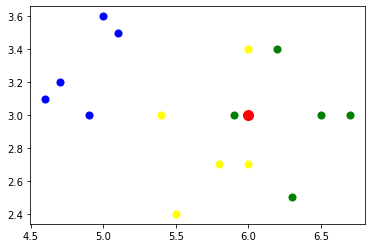

In [6]:


for i in dataset:
    for ii in dataset[i]:
        pyplot.scatter(ii[0], ii[1], s=50, color=i)  #数据集样本画图（仅展示两个特征）
        
pyplot.scatter(new_features[0], new_features[1], s=100, color='red')  # 新样本--红色，画图展示
pyplot.show()

### ANN

In [ ]:
# pip install hnswlib

In [16]:

import hnswlib
import numpy as np


# 同上iris数据集，前五个为blue类,中间5个为green类，最后5个为yellow类
dataset2 = np.array([
        [5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2], 
        [6.7, 3. , 5.2, 2.3],
        [6.3, 2.5, 5. , 1.9],
        [6.5, 3. , 5.2, 2. ],
        [6.2, 3.4, 5.4, 2.3],
        [5.9, 3. , 5.1, 1.8],
        [5.5, 2.4, 3.7, 1. ],
        [5.8, 2.7, 3.9, 1.2],
        [6. , 2.7, 5.1, 1.6],
        [5.4, 3. , 4.5, 1.5],
        [6. , 3.4, 4.5, 1.6]
])

def fit_hnsw_index(features, ef=100, M=16, save_index_file=False):
    # Convenience function to create HNSW graph
    # features : list of lists containing the embeddings
    # ef, M: parameters to tune the HNSW algorithm
    
    num_elements = len(features)
    labels_index = np.arange(num_elements)    
    EMBEDDING_SIZE = len(features[0])    # Declaring index
    # possible space options are l2, cosine or ip
    p = hnswlib.Index(space='l2', dim=EMBEDDING_SIZE)    # Initing index - the maximum number of elements should be known
    p.init_index(max_elements=num_elements, ef_construction=ef, M=M)    # Element insertion
    int_labels = p.add_items(features, labels_index)    # Controlling the recall by setting ef
    # ef should always be > k
    p.set_ef(ef) 
    
    # If you want to save the graph to a file
    if save_index_file:
         p.save_index(save_index_file)
    
    return p

p = fit_hnsw_index(dataset2)  # 创建 HNSW 索引

In [34]:
#  通过HNSW索引快速查询k个近邻

ann_neighbor_indices, ann_distances = p.knn_query(new_features, 3)

print('K个近邻：',ann_neighbor_indices)

print('距离值:',ann_distances)

K个近邻： [[ 9 12 14]]
距离值: [[0.09999981 0.21999978 0.29000014]]
